# Deterministic Algorithm

## Setup

In [1]:
from graphs import *;

## Graph Definition

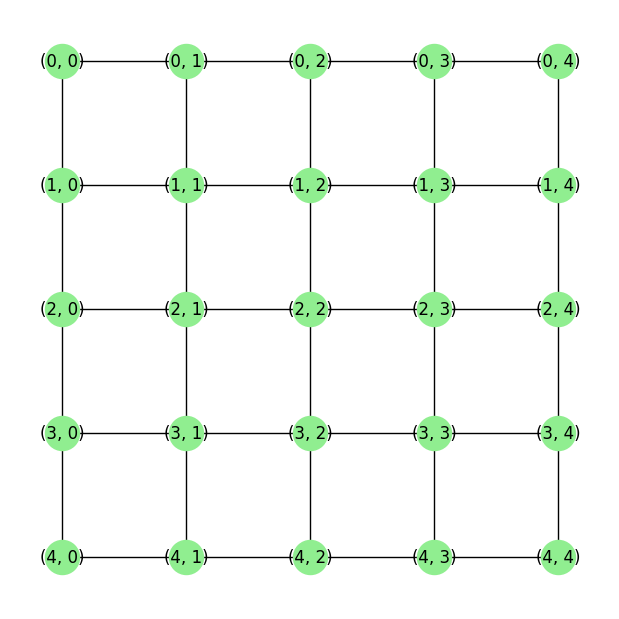

networkx.classes.graph.Graph

In [2]:
# Generate a single graph
rows, cols = 5, 5
grid_graph = generate_2D_grid_graph(rows, cols)
adjacency_matrix = nx.adjacency_matrix(grid_graph).todense()

plot_graph(grid_graph, 'grid')

type(grid_graph)

## Finding MCDS in 2D Graphs

### Deterministic Function

Chunks: [[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)], [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)], [(3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2)], [(3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5), (5, 3), (5, 4), (5, 5)]]
Activated nodes per chunk: [[(1.0, 1.0)], [(1.0, 4.0), (1.0, 3.0), (1.0, 2.0)], [(4.0, 1.0)], [(4.0, 4.0), (4.0, 3.0), (4.0, 2.0)]]
[(1.0, 1.0), (1.0, 4.0), (1.0, 3.0), (1.0, 2.0), (4.0, 1.0), (4.0, 4.0), (4.0, 3.0), (4.0, 2.0)]


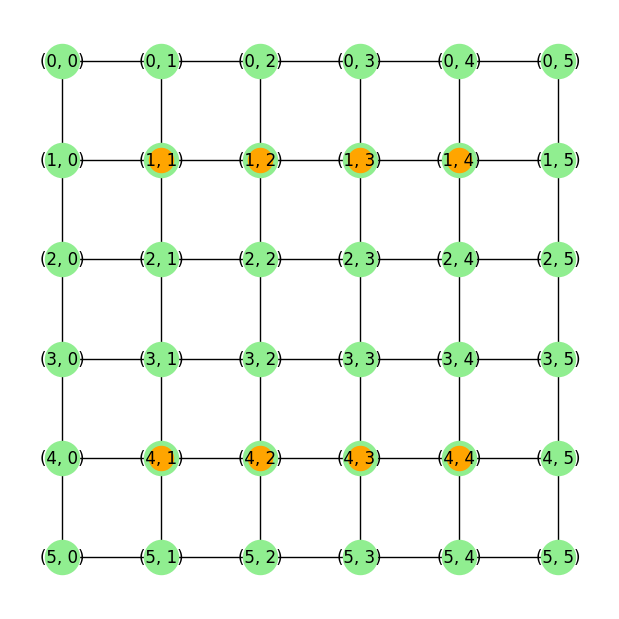

In [9]:
#divide into 3x3 chunks
#start on a corner and fill in middle of chunk
#while still on 3x3 chunks, connect middles of chunks (kind of like bfs)
#finish edges

def three_by_three_grid(G, chunk, last = None): #graph, current chunk (subgraph), last chunk
    activate_nodes = []
    xs = [n[0] for n in chunk]
    ys = [n[1] for n in chunk]
    avg_x = sum(xs) / len(xs)
    avg_y = sum(ys) / len(ys)
    activate_nodes.append((avg_x, avg_y))
    if last is not None:
        last_xs = [n[0] for n in last]
        last_ys = [n[1] for n in last]
        last_avg_x = sum(last_xs) / len(last_xs)
        last_avg_y = sum(last_ys) / len(last_ys)
        if avg_x == last_avg_x:
            if avg_y < last_avg_y:
                activate_nodes.append((avg_x, avg_y + 1))
                activate_nodes.append((avg_x, avg_y + 2))
            elif avg_y > last_avg_y:
                activate_nodes.append((avg_x, avg_y - 1))
                activate_nodes.append((avg_x, avg_y - 2))
        elif avg_y == last_avg_y:
            if avg_x < last_avg_x:
                activate_nodes.append((avg_x + 1, avg_y))
                activate_nodes.append((avg_x + 2, avg_y))
            elif avg_x > last_avg_x:
                activate_nodes.append((avg_x - 1, avg_y))
                activate_nodes.append((avg_x - 2, avg_y))
    
    return activate_nodes

test_rows, test_cols = 6, 6
test_grid = generate_2D_grid_graph(test_rows, test_cols)

# Divide the grid into 3x3 chunks
chunks = []
for i in range(0, test_rows, 3):
    for j in range(0, test_cols, 3):
        chunk = []
        for x in range(i, min(i+3, test_rows)):
            for y in range(j, min(j+3, test_cols)):
                chunk.append((x, y))
        if chunk:
            chunks.append(chunk)

# Apply the function to each chunk
results = []
for idx, chunk in enumerate(chunks):
    last = chunks[idx-1] if idx > 0 else None
    nodes = three_by_three_grid(test_grid, chunk, last)
    results.append(nodes)

print("Chunks:", chunks)
print("Activated nodes per chunk:", results)

# Overlay the activated nodes on the test grid
# Flatten the list of activated nodes
activated_nodes = list(itertools.chain.from_iterable(results))
overlay_subset(test_grid, activated_nodes, type='grid')